In [43]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Reading the dataset into a dataframe and replacing column names with our custom names.
column_names = ['pregnant' , 'glucose' , 'bp', 'skin', 'insulin','bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('anaconda3\diabetes.csv', header=None, names=column_names,skiprows=(0,0))

In [45]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
#feature selection
feature_Coulmns = ['pregnant' , 'insulin','bmi', 'age', 'glucose' , 'bp', 'pedigree']
x = df[feature_Coulmns]
y = df.label
x.describe()
#y.describe()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,33.240885,120.894531,69.105469,0.471876
std,3.369578,115.244002,7.884160,11.760232,31.972618,19.355807,0.331329
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.078000
25%,1.000000,0.000000,27.300000,24.000000,99.000000,62.000000,0.243750
50%,3.000000,30.500000,32.000000,29.000000,117.000000,72.000000,0.372500
75%,6.000000,127.250000,36.600000,41.000000,140.250000,80.000000,0.626250
max,17.000000,846.000000,67.100000,81.000000,199.000000,122.000000,2.420000


In [49]:
#Correlation plots
corr= df.corr()

In [50]:
plt.figure(figsize=(80,60))

<Figure size 5760x4320 with 0 Axes>

<Figure size 5760x4320 with 0 Axes>

In [51]:
coor_range =corr[(corr>=0.3) | (corr <=-0.1)]

Text(0.5, 15.0, 'Features on X axis')

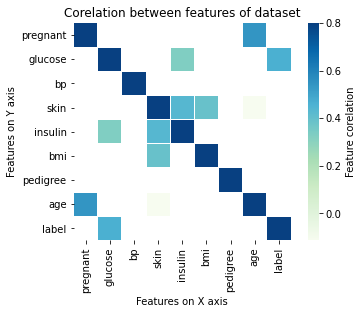

In [52]:
sns.heatmap(coor_range,vmax=.8,linewidth=0.01,square=True,cmap='GnBu',linecolor='white',cbar_kws={'label' :'Feature corelation'})
plt.title('Corelation between features of dataset')
plt.ylabel('Features on Y axis')
plt.xlabel('Features on X axis')

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
logistic_function = LogisticRegression()

In [55]:
logistic_function.fit(x_train,y_train)
y_prediction=logistic_function.predict(x_test)

In [56]:
from sklearn import metrics
cnf_matrix_eval = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix_eval

array([[79, 20],
       [19, 36]], dtype=int64)

Text(33.0, 0.5, 'Predicted Label')

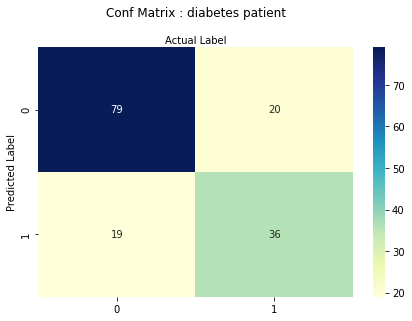

In [57]:
class_names=[0,1]
fig,ax =plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#heatmap for conf matrix
sns.heatmap(pd.DataFrame(cnf_matrix_eval), annot =True, cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Conf Matrix : diabetes patient', y=1.1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

In [58]:
#confusion matrix conclusion for evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_prediction))
print("Precison:",metrics.precision_score(y_test,y_prediction))
print("Recall:",metrics.recall_score(y_test,y_prediction))
print(metrics.accuracy_score(y_test,y_prediction)*100, "% :", "chances that person having diabetes is in this dataset")
print(y_prediction)


Accuracy: 0.7467532467532467
Precison: 0.6428571428571429
Recall: 0.6545454545454545
74.67532467532467 % : chances that person having diabetes is in this dataset
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


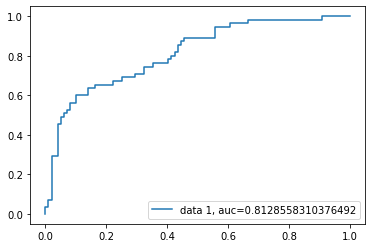

In [59]:
#Performance evaluation using ROC curve
y_prediction_probability = logistic_function.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_prediction_probability)
auc = metrics.roc_auc_score(y_test,y_prediction_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# here we can see the AUC score is 0.81. 

In [60]:
from sklearn.metrics import f1_score
f1_score(y_test,y_prediction,average=None)

array([0.80203046, 0.64864865])